# Proyek Analisis Data : Air Quality Dataset

- Nama : Rizal Aji Santoso
- Email : rizalsantos148@gmail.com
- ID Dicoding : rizalajisantos0

### Tahapan dalam proses analisis data adalah sebagai berikut :

<div>
<img src="image_d844eb0462.png" width="1000"/>
</div>

# 1. Menentukan Pertanyaan

1. Apakah terdapat hubungan antara curah hujan dengan jumlah polutan (PM10, SO2, NO2) di udara distrik Shunyi?

2. Apakah ada korelasi antara kecepatan angin (kolom 'WSPM') di distrik Shunyi dengan polutannya (PM10, SO2, NO2)?

3. Bagaimana tren curah hujan di bulannya?

# 2. Mengimpor Library dan Dataset yang Diperlukan

In [2]:
# Mengimpor library yang dibutuhkan dalam analisis data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengimpor dataset yang dibutuhkan dan memberi nama dataset tersebut "air_quality_df"
air_quality_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')

# Menampilkan 5 records teratas pada dataset
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


# 3. Explore Data

In [13]:
# Menampilkan dimensi dari dataset
shape = air_quality_df.shape
shape

(35064, 18)

In [5]:
# Menampilkan nama-nama variabel, jumlah data, dan jenis data pada masing-masing kolom
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
# Menampilkan jumlah missing value pada setiap variabel dan persentase missing value terhadap keseluruhan record pada dataset
missing_value = air_quality_df.isna().sum().sort_values(ascending=False).reset_index()
missing_value = missing_value.rename(columns={0:'missing'})
missing_value['percentage'] = (missing_value['missing']/shape[0])*100
missing_value

,index,missing,percentage
0,CO,2178,6.211499
1,O3,1489,4.246521
2,NO2,1365,3.892882
3,SO2,1296,3.696099
4,PM2.5,913,2.603810
5,PM10,548,1.562856
6,wd,483,1.377481
7,DEWP,54,0.154004
8,PRES,51,0.145448
9,RAIN,51,0.145448


In [16]:
# Melihat data yang terdupliksasi
print('Jumlah Duplikasi :', air_quality_df.duplicated().sum())

Jumlah Duplikasi : 0


In [17]:
# Menampilkan ringkasan statistik deskriptif pada variabel numerik dataset
air_quality_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0000
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0000
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0000
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0000
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0000
PM2.5,34151.0,79.491602,81.231739,2.0000,19.00,55.0,112.00,941.0000
PM10,34516.0,98.737026,89.143718,2.0000,31.00,77.0,138.00,999.0000
SO2,33768.0,13.572039,19.572068,0.2856,2.00,5.0,17.00,239.0000
NO2,33699.0,43.908865,30.996828,2.0000,19.00,37.0,62.00,258.0000
CO,32886.0,1187.063979,1156.374102,100.0000,400.00,800.0,1500.00,10000.0000


# 4. Prepare Data

In [23]:
# Membuat dataset baru berupa "df_clean" yang merupakan versi dataset "air_quality_df" yang telah dibersihkan
df_clean = air_quality_df.copy()
# Memilih variabel-variabel yang relevan
df_clean = df_clean.drop(columns=['No','PM2.5','CO','O3','TEMP','PRES','DEWP','wd','station'])
# Karena data merupakan timeseries, maka metode yang digunakan untuk mengatasi null values adalah metode interpolasi data secara linier
df_clean = df_clean.interpolate(method='linear',limit_direction='forward')
df_clean

,year,month,day,hour,PM10,SO2,NO2,RAIN,WSPM
0,2013,3,1,0,6.0,3.0,8.0,0.0,9.3
1,2013,3,1,1,12.0,3.0,7.0,0.0,9.4
2,2013,3,1,2,14.0,3.0,7.0,0.0,8.6
3,2013,3,1,3,12.0,3.0,5.0,0.0,6.6
4,2013,3,1,4,12.0,3.0,6.0,0.0,4.5
...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,72.0,8.0,92.0,0.0,1.8
35060,2017,2,28,20,55.0,17.0,86.0,0.0,1.5
35061,2017,2,28,21,28.0,4.0,30.0,0.0,1.7
35062,2017,2,28,22,20.0,9.0,33.0,0.0,1.8


In [26]:
# Menampilkan kembali jumlah missing value pada masing-masing variabel
df_clean.isna().sum().sort_values(ascending=False)


year     0
month    0
day      0
hour     0
PM10     0
SO2      0
NO2      0
RAIN     0
WSPM     0
dtype: int64

In [27]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM10,35064.0,99.271936,90.579040,2.0000,31.00,77.0,139.00,999.0
SO2,35064.0,13.445971,19.463506,0.2856,2.00,5.0,16.00,239.0
NO2,35064.0,44.094695,30.907747,2.0000,20.00,37.0,62.00,258.0
RAIN,35064.0,0.061010,0.761118,0.0000,0.00,0.0,0.00,37.3
WSPM,35064.0,1.807784,1.287542,0.0000,1.00,1.5,2.30,12.8


# 5. Analyze Data & Present Findings

### Apakah terdapat hubungan antara curah hujan dengan jumlah polutan (PM10, SO2, NO2) di udara distrik Shunyi?

Untuk menjawab pertanyaan tersebut, dapat dengan menggunakan fungsi korelasi (.corr) pada variabel curah hujan 'RAIN' dengan variabel polutan.

In [31]:
rain_corr = df_clean[['RAIN','PM10','SO2','NO2']].corr()
rain_corr

,RAIN,PM10,SO2,NO2
RAIN,1.000000,-0.023373,-0.038928,-0.051217
PM10,-0.023373,1.000000,0.462236,0.640850
SO2,-0.038928,0.462236,1.000000,0.505000
NO2,-0.051217,0.640850,0.505000,1.000000


<Axes: >

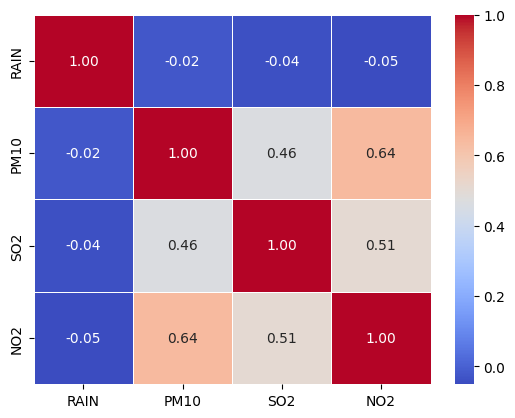

In [32]:
# Menggunakan seaborn heatmap untuk menampilkan korelasi
sns.heatmap(rain_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Dari hasil pengujian korelasi diatas, tidak ditemukan adanya korelasi sama sekali antara curah hujan dengan jumlah polutan di Distrik Shunyi, hal ini diperkuat dengan menggunakan scatterplot dibawah

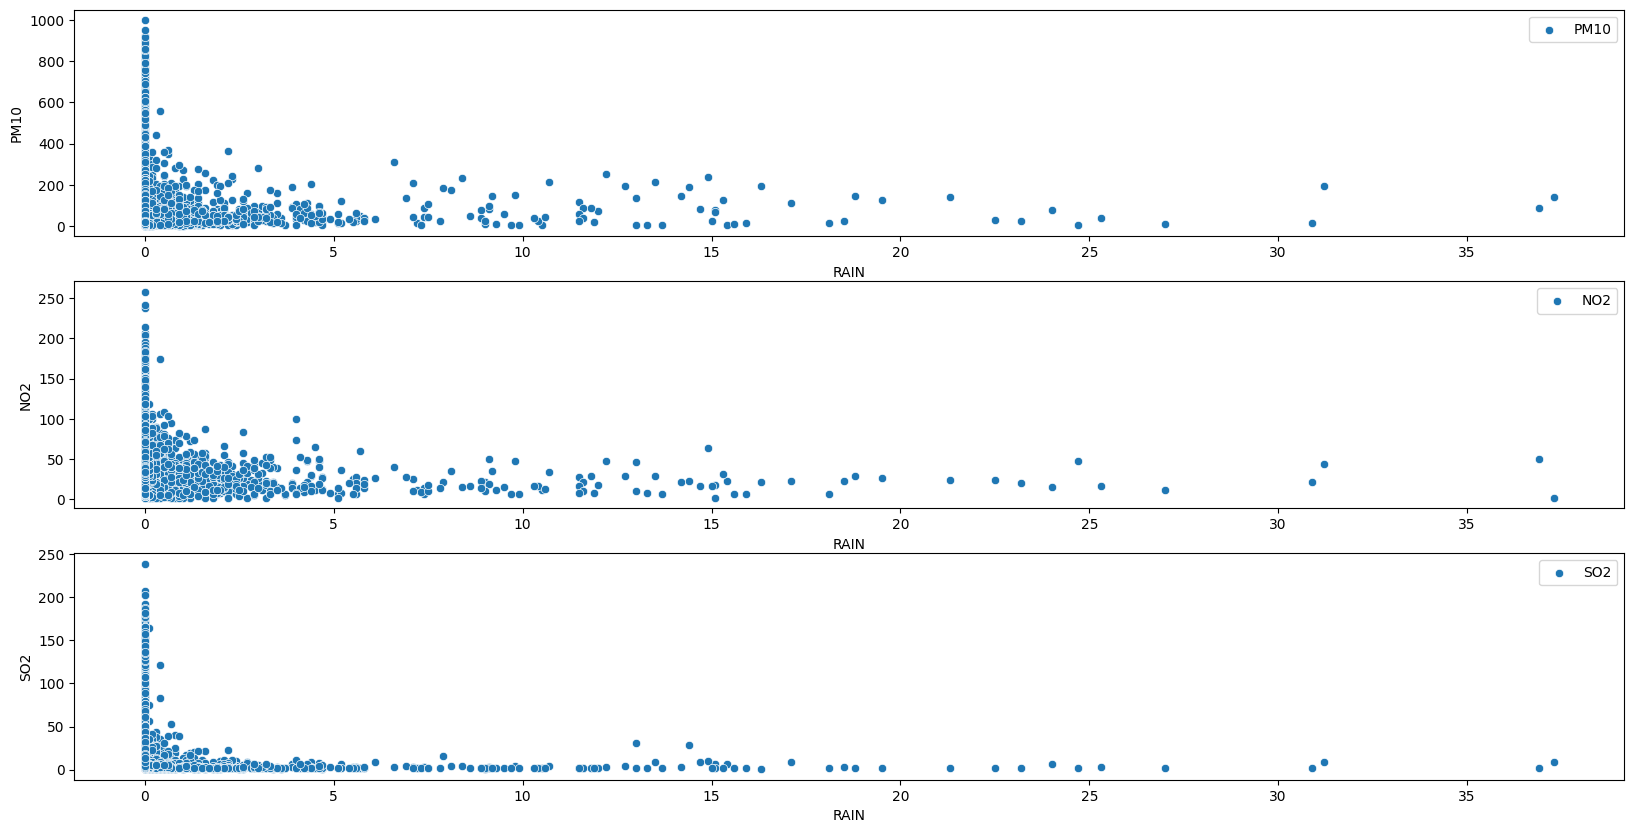

In [33]:
fig,axs = plt.subplots(3,1,figsize=(20,10))
sns.scatterplot(ax=axs[0],x='RAIN', y='PM10', data = df_clean,label='PM10')
sns.scatterplot(ax=axs[1],x='RAIN', y='NO2', data = df_clean,label='NO2')
sns.scatterplot(ax=axs[2],x='RAIN', y='SO2', data = df_clean,label='SO2')
plt.legend()
plt.show()

### Apakah ada korelasi antara kecepatan angin (kolom 'WSPM') di distrik Shunyi dengan polutannya (PM10, SO2, NO2)?

Seperti pada pertanyaan sebelumnya, hubungan antara kecepatan angin dengan polutan di distrik Shunyi dapat diketahui dengan menggunakan fungsi korelasi.

In [34]:
wind_corr = df_clean[[ 'WSPM','PM10', 'SO2', 'NO2']].corr()
wind_corr

,WSPM,PM10,SO2,NO2
WSPM,1.000000,-0.189076,-0.122205,-0.382243
PM10,-0.189076,1.000000,0.462236,0.640850
SO2,-0.122205,0.462236,1.000000,0.505000
NO2,-0.382243,0.640850,0.505000,1.000000


<Axes: >

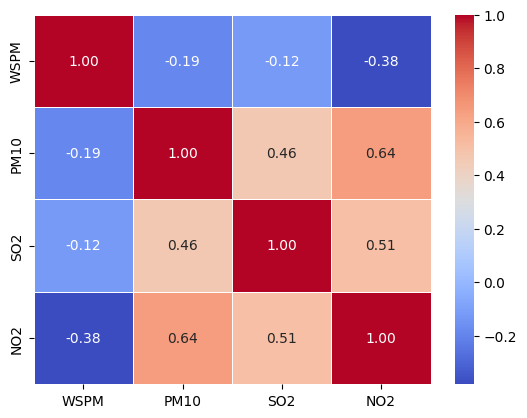

In [35]:
sns.heatmap(wind_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Terdapat korelasi negatif yang lemah antara kecepatan angin dengan jumlah polutan di Distrik Shunyi, korelasi terkuat adalah pada variabel NO2 sebesar -0.38. 

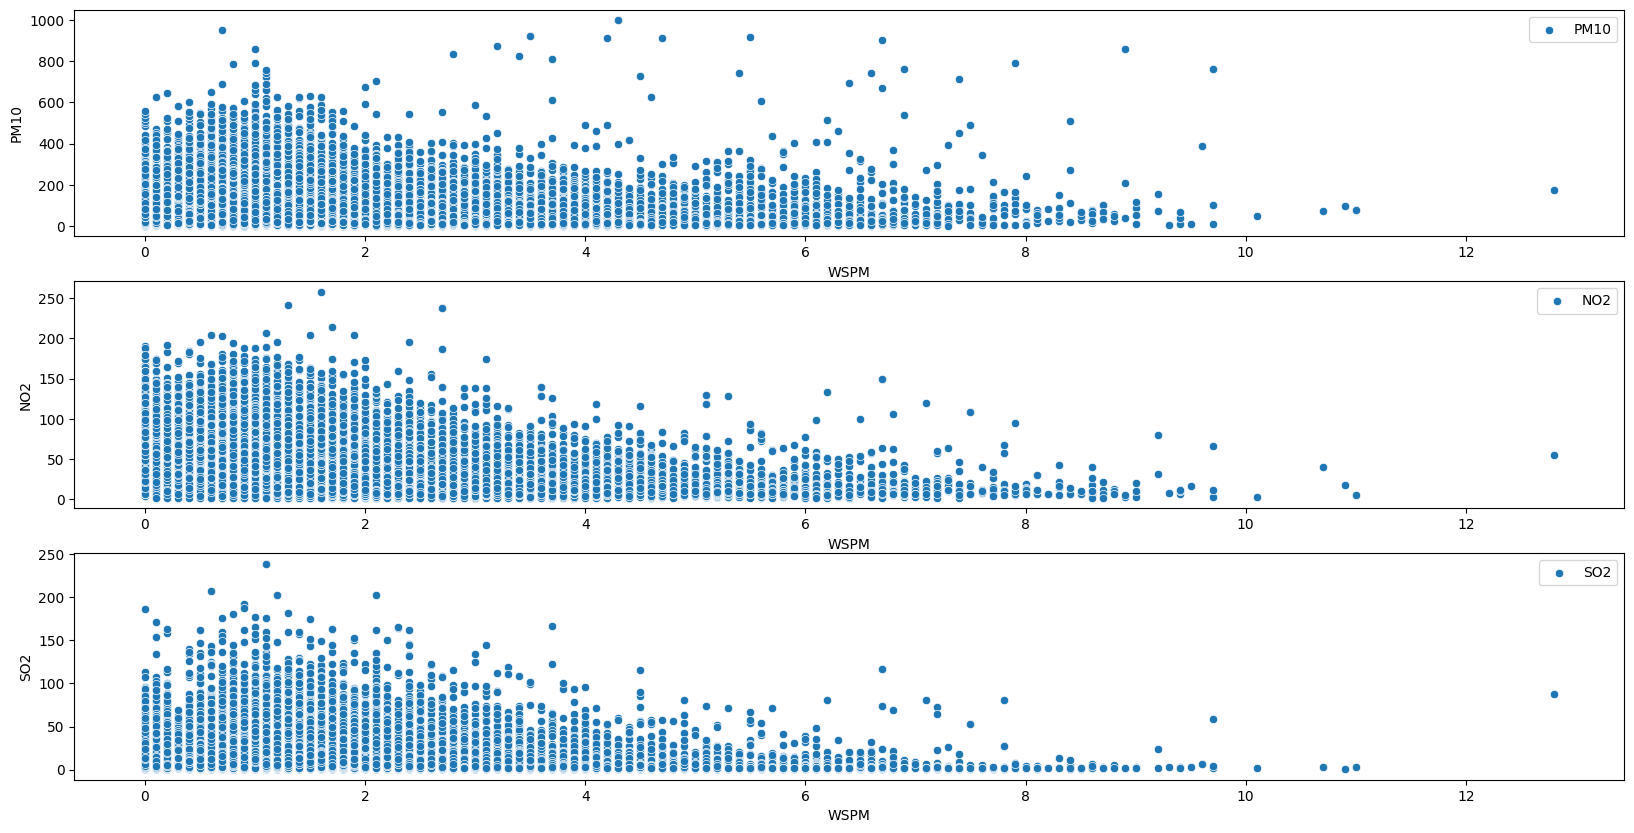

In [37]:
fig,axs = plt.subplots(3,1,figsize=(20,10))
sns.scatterplot(ax=axs[0],x='WSPM', y='PM10', data = air_quality_df,label='PM10')
sns.scatterplot(ax=axs[1],x='WSPM', y='NO2', data = air_quality_df,label='NO2')
sns.scatterplot(ax=axs[2],x='WSPM', y='SO2', data = air_quality_df,label='SO2')
plt.legend()
plt.show()

#  3. Bagaimana tren curah hujan di tiap bulannya?

Untuk mencari tahu tren cuaca pada tiap bulannya, pertama adalah menjumlahkan curah hujan pada tiap bulan dan tahun menggunakan metode .groupby guna mengetahui total curah hujan tiap bulan per tahun.
Selanjutnya menggunakan lineplot dengan nilai x berupa ‘month’ atau bulan dan nilai y berupa ‘RAIN’ atau tingkat curah hujan dan hue berupa ‘year’ agar dapat membandingkan tiap tahunnya.

In [45]:
# Mengelompokkan data menjadi bulan dan tahun lalu menjumlahkan kolom crah hujan pada masing-masing bulan dan tahun tersebut
average_rain_by_month_year = air_quality_df.groupby(['year', 'month'])['RAIN'].sum().reset_index()
average_rain_by_month_year

,year,month,RAIN
0,2013,3,15.1
1,2013,4,9.2
2,2013,5,1.5
3,2013,6,111.1
4,2013,7,199.7
5,2013,8,89.6
6,2013,9,42.1
7,2013,10,7.8
8,2013,11,0.0
9,2013,12,0.0


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_14748\16226197.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=average_rain_by_month_year['month'], y=average_rain_by_month_year['RAIN'], hue=average_rain_by_month_year['year'], palette='Set1',ci=None)


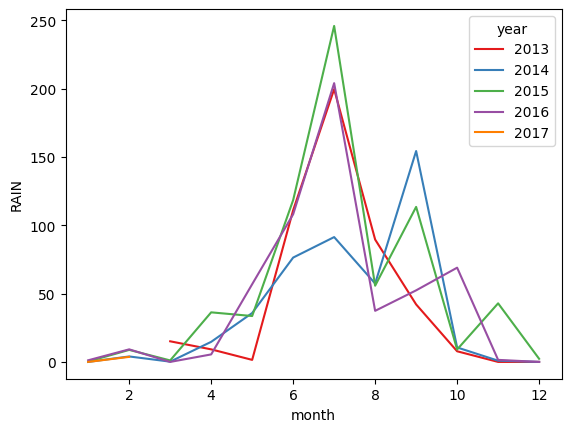

In [44]:
sns.lineplot(x=average_rain_by_month_year['month'], y=average_rain_by_month_year['RAIN'], hue=average_rain_by_month_year['year'], palette='Set1',ci=None)
plt.show()

Dapat diketahui, pada Distrik Shunyi curah hujan cenderung tinggi dari bulan ke 6 (Juni) sampai bulan ke 9 (September). 